In [159]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt

In [160]:
missing_values = ["--"]

In [161]:
data = pd.read_csv('./macau_weather.csv', na_values = missing_values)

In [162]:
data.head()

,num,date,air_pressure,high_tem,aver_tem,low_tem,relative_humidity,sunlight_time,wind_direction,wind_speed,rain_accumulation
0,1,2020/10/1,1009.5,26.9,25.8,24.6,83,0.2,90.0,16.0,7.6
1,2,2020/10/2,1010.9,28.8,26.7,25.5,76,6.6,90.0,14.0,0.0
2,3,2020/10/3,1011.5,29.5,27.2,25.6,79,9.2,90.0,10.0,0.0
3,4,2020/10/4,1010.3,32.0,27.8,25.9,78,9.3,202.5,7.0,0.0
4,5,2020/10/5,1011.3,30.5,26.9,24.8,83,2.7,90.0,12.0,3.6


In [163]:
data[data.isnull().any(axis=1)].head()
before_rows = data.shape[0]

In [164]:
data = data.dropna()

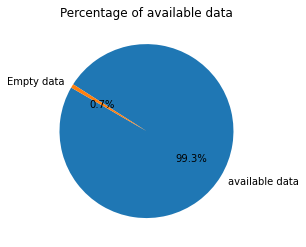

In [167]:
after_rows = data.shape[0]
adp = after_rows/before_rows*100
edp = (before_rows - after_rows)/before_rows *100
labels = ['available data','Empty data']
sizes = [adp, edp]
explode = (0,0)
plt.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
plt.title("Percentage of available data")
plt.show()

In [139]:
clean_data = data.copy()
clean_data['rain_accumulation'] = (clean_data['rain_accumulation']>1) *1
clean_data['rain_accumulation'].head()

0    1
1    0
2    0
3    0
4    1
Name: rain_accumulation, dtype: int32

In [140]:
y = clean_data[['rain_accumulation']].copy()
y.head()

,rain_accumulation
0,1
1,0
2,0
3,0
4,1


In [141]:
morning_features = ['air_pressure', 'aver_tem', 'relative_humidity',
       'sunlight_time', 'wind_direction', 'wind_speed']

In [142]:
x=clean_data[morning_features].copy()
x.columns

Index(['air_pressure', 'aver_tem', 'relative_humidity', 'sunlight_time',
       'wind_direction', 'wind_speed'],
      dtype='object')

In [143]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=324)

In [144]:
humidity_classifier = DecisionTreeClassifier(max_leaf_nodes=10,random_state=0)
humidity_classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

In [145]:
y_predicted = humidity_classifier.predict(X_test)

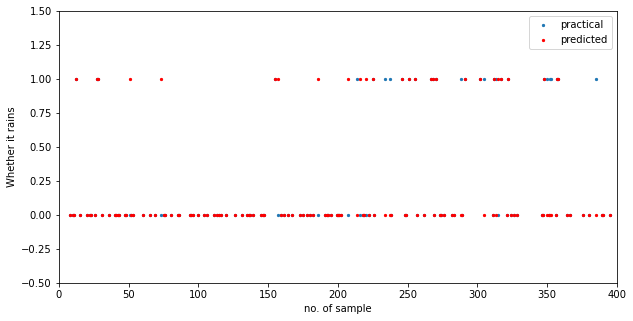

In [222]:
plt.figure(figsize=(10,5))
x = y_test.index
y = y_test[['rain_accumulation']]
x2 = y_test.index
y2 = y_predicted
plt.xlim(0,400)
plt.ylim(-0.5,1.5)
plt.scatter(x, y,label="practical",s =5)
plt.scatter(x2, y2,color = 'red',label="predicted",s =5)
plt.xlabel("no. of sample")
plt.ylabel("Whether it rains")
plt.legend()
plt.show()

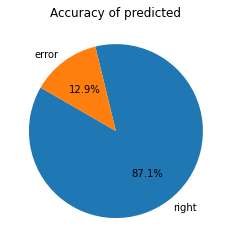

In [209]:
acc = accuracy_score(y_test,y_predicted)*100
labels = ['right','error']
sizes = [acc, 100-acc]
explode = (0,0)
plt.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
plt.title("Accuracy of predicted")
plt.show()